In [ ]:
### 1. 머신러닝 (50점)
# 문제 : https://www.datamanim.com/dataset/ADPpb/00/24.html

In [12]:
# ## 1. 데이터 확인 및 전처리
# 1.1 데이터 EDA 및 시각화
# 1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라
# 1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명
# 1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명
# 1.5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라
# 1.6 모델 최적화 방안에 대해 구체적으로 설명하라

# ㅁ 데이터 설명
# 성별(sex) 바이너리 : ‘F’ - 여성 또는 ‘M’ - 남성
# 나이(age) 숫자: 15 - 22
# 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 ‘A’: 별거
# 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육
# 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육
# 주보호자(guardian) 명목형 : ‘어머니’, ‘아버지’ 또는 ‘기타’
# 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상
# 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상
# 학고횟수(failures) 숫자 : 1, 2, 3 else 4
# 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)
# 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


In [14]:
# 1.1 데이터 EDA 및 시각화
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


In [15]:
df.isna().sum()
# age, traveltime, freetime 결측치 존재
# sex, Pstatus, guardian는 object 변수이고 나머지는 수치형 변수임

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64

In [16]:
df['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

(array([287.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

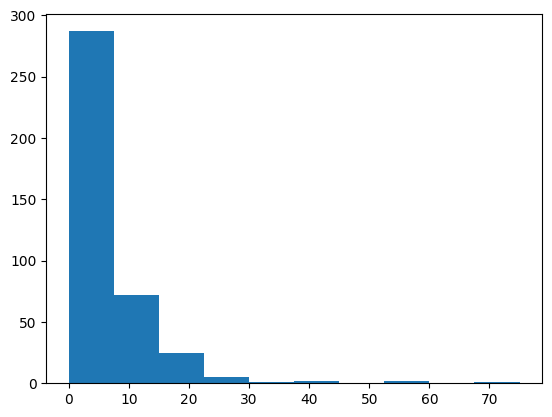

In [17]:
import matplotlib.pyplot as plt
plt.hist('absences', data = df)
# absences 평균 5.7, 중위수 4로 대부분 0~8 사이에 데이터가 존재하며 데이터가 왼쪽으로 치우쳐 있음

In [18]:
df.describe()

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
count,392.000000,395.000000,395.000000,395.000000,392.000000,395.000000,395.000000,390.000000,395.000000
mean,16.698980,2.521519,2.749367,2.035443,1.446429,0.334177,3.944304,3.233333,5.708861
std,1.279865,1.088201,1.094735,0.839240,0.695022,0.743651,0.896659,1.000985,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,17.000000,2.000000,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,4.000000
75%,18.000000,3.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000


In [19]:
df.corr('pearson')
# absences와 높은 상관관계를 가지는 독립변수는 없음
# 독립변수간 높은 상관관계를 가지는 변수는 없음

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
age,1.000000,-0.162190,-0.161852,-0.005905,0.064570,0.243075,0.052644,0.007248,0.174157
Fedu,-0.162190,1.000000,0.623455,-0.009175,-0.166499,-0.250408,-0.001370,-0.011424,0.024473
Medu,-0.161852,0.623455,1.000000,0.064944,-0.163966,-0.236680,-0.003914,0.030082,0.100285
studytime,-0.005905,-0.009175,0.064944,1.000000,-0.098343,-0.173563,0.039731,-0.138619,-0.062700
traveltime,0.064570,-0.166499,-0.163966,-0.098343,1.000000,0.094084,-0.021061,-0.011963,-0.009684
failures,0.243075,-0.250408,-0.236680,-0.173563,0.094084,1.000000,-0.044337,0.076487,0.063726
famrel,0.052644,-0.001370,-0.003914,0.039731,-0.021061,-0.044337,1.000000,0.153086,-0.044354
freetime,0.007248,-0.011424,0.030082,-0.138619,-0.011963,0.076487,0.153086,1.000000,-0.056825
absences,0.174157,0.024473,0.100285,-0.062700,-0.009684,0.063726,-0.044354,-0.056825,1.000000


(array([ 82., 102.,  97.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <BarContainer object of 10 artists>)

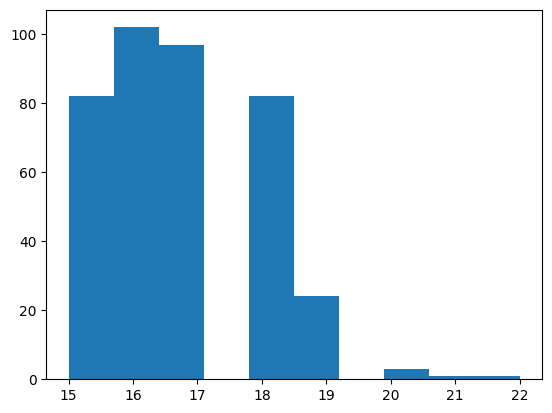

In [20]:
# 1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라
plt.hist('age', data = df)

(array([255.,   0.,   0., 107.,   0.,   0.,  22.,   0.,   0.,   8.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

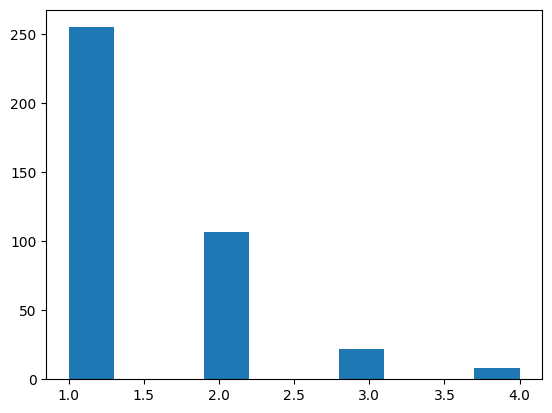

In [21]:
plt.hist('traveltime', data = df)

(array([ 19.,   0.,  64.,   0.,   0., 153.,   0., 115.,   0.,  39.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

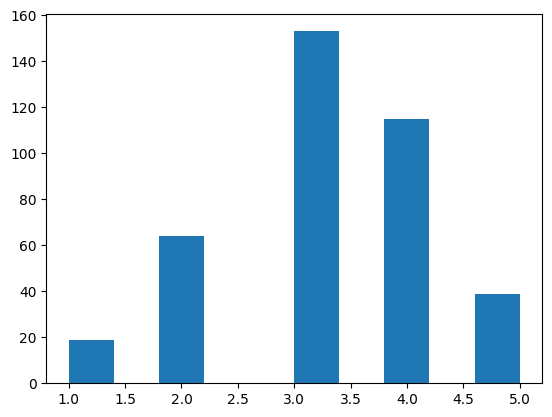

In [22]:
plt.hist('freetime', data = df)

In [23]:
# KNN으로 결측치 대체
fill_columns = ['age', 'traveltime', 'freetime']
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_knnim = imputer.fit_transform(df[fill_columns])
df[fill_columns] = df_knnim
df.isna().sum()

sex           0
age           0
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    0
failures      0
famrel        0
freetime      0
absences      0
dtype: int64

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <BarContainer object of 10 artists>)

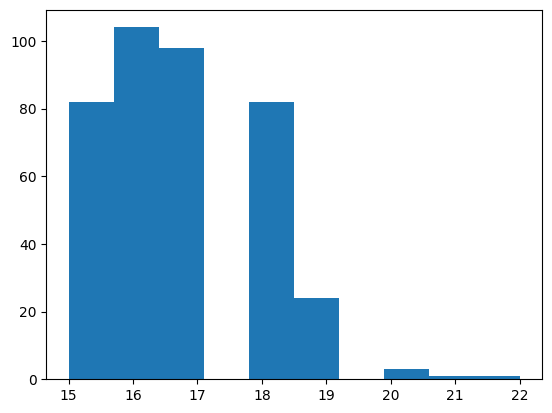

In [24]:
plt.hist('age', data = df)

(array([256.,   1.,   1., 107.,   0.,   0.,  22.,   0.,   0.,   8.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

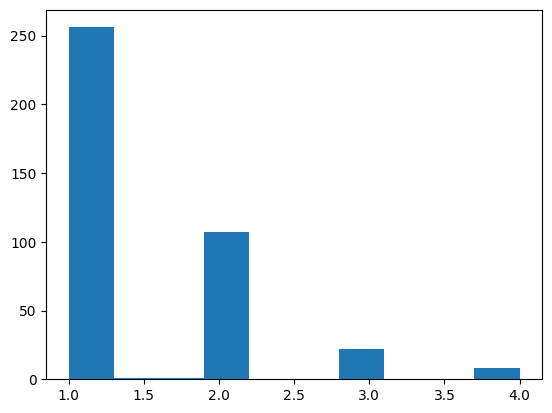

In [25]:
plt.hist('traveltime', data = df)

In [ ]:
# 추가 전처리가 필요한 이유 : 종속변수와 상관관계가 높은 변수가 없어서 분석정확도가 낮을 확률이 높음
# 파생변수 생성을 통해서 보다 종속변수를 잘 설명할 수 있는 독립변수 발굴이 필요함

In [33]:
# 1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명
# SVM과 radomforest를 선택함.
# 회귀분석에서 다중 공산성 문제를 해결할 수 있고 분석정확도가 높아서 선택함
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, 
# 현업에서 사용시 주의할 점 등에 대해 기술하시오.
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

df02 = pd.get_dummies(data = df, columns = ['sex', 'Pstatus', 'guardian'], drop_first = True)

X = df02.drop(['absences'], axis = 1)
y = df02['absences']

In [34]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 2023)

In [36]:
# 정규화
scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# SVM  최적 모델 찾기1
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [0.1, 1,10,100, 1000],'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
]

grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [ ]:
# SVM  최적 모델 찾기1
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [0.001, 0.01, 10000, 10000],'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 100, 1000]}
]

grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [42]:
import numpy as np
svr = SVR(C=10000, gamma = 1000) 
svr.fit(X_train_scaled, y_train)

print("svm R2 : ", svr.score(X_test_scaled, y_test))
print("svm RMSE:", np.sqrt(mean_squared_error(y_test,svr.predict(X_test_scaled))))

svm R2 :  -0.019661935831589705
svm RMSE: 6.2645021859757435


In [61]:
# RandomForest 최적 모델 찾기
rf_grid = [
    { 'max_depth': range(2,20,2), 'min_samples_split': range(2,20,2) }
]

rf  = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state = 2023), param_grid = rf_grid, cv = 5) # random_state 미 기입하면 분석마다 달라짐
rf.fit(X_train_scaled, y_train) 

print(rf.best_params_)
print("R2 : ", rf.score(X_test_scaled, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf.predict(X_test_scaled))))

{'max_depth': 2, 'min_samples_split': 8}
R2 :  0.001286182292000726
RMSE: 6.199818715156966


In [ ]:
# 1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명
# 모델의 설명력인 R2와 예측치와 실제값의 오차인 RMSE를 평가 기준으로 선정. 모델의 정확도와 실제 오차를 2가지 측면에서 비교하기 위해서 선정함.

In [ ]:
## @@ MAE 등 평가기준 작성

(array([57., 18., 20.,  9.,  5.,  2.,  4.,  1.,  2.,  1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

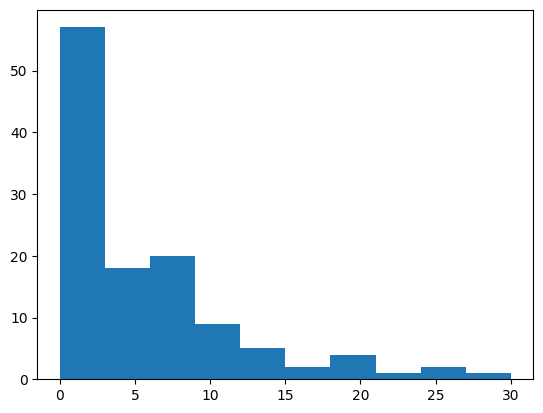

In [62]:
# 1.5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라
# 학습하지 않은 test 데이터 적용시에 설명력이 0.001로 일상생활의 다른 데이터 적용시에도 잘 설명할 수 있음.
# 그렇기 때문에 교차검증을 통해 이를 설명하고 싶었다. 타임아웃으로 방법론만 제시하고 끝냈다.
plt.hist(y_test)

(array([16., 53., 41.,  7.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 3.34835318,  4.7862345 ,  6.22411582,  7.66199714,  9.09987845,
        10.53775977, 11.97564109, 13.4135224 , 14.85140372, 16.28928504,
        17.72716636]),
 <BarContainer object of 10 artists>)

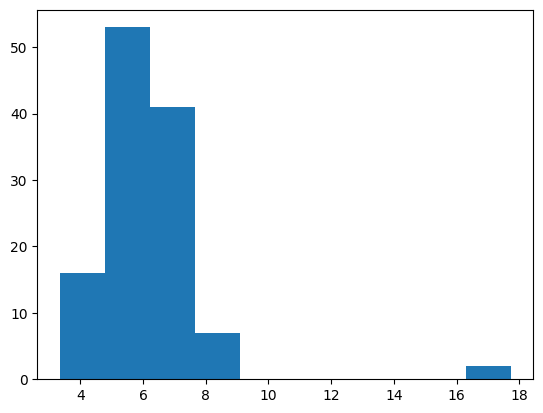

In [67]:
plt.hist(rf.predict(X_test_scaled))

In [65]:
# 1.6 모델 최적화 방안에 대해 구체적으로 설명하라
# 보다 정확한 분석을 위해서는 더 많은 변수와 더 많은 기간을 대상으로 분석하여 분석의 정확도를 향상시킬 수 있다.
# 더불어, 딥러닝 기법을 활용하여 보다 심층적으로 데이터를 학습시켜 모델을 최적화 할 수 있다.
# 그리드서치와 같은 과정을 통해 파라미터 최적화가 필요하다 작성하였다.